## The New York Times Covid-19 Database

The New York Times Covid-19 Database is 
a county-level database of confirmed cases and deaths, 
compiled from state and local governments and health departments across the United States.
The initial release of the database was on Thursday, March 26, 2020, and it is updated daily. 

These data have fueled many articles and graphics by The Times; these are updated regularly at
[https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html). 
The Times has created many visualizations that are effective communications of important information about the pandemic. 

The data are publically available via GitHub: [https://github.com/nytimes/covid-19-data](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).  In this illustration we will only use
the data aggregated at the state level. 

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
covid_table = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
covid_table = covid_table.drop('fips', axis=1)
covid_table.tail(20)

,date,state,cases,deaths
51170,2022-09-12,North Dakota,266273,2401
51171,2022-09-12,Northern Mariana Islands,13155,40
51172,2022-09-12,Ohio,3096557,39576
51173,2022-09-12,Oklahoma,1184662,14765
51174,2022-09-12,Oregon,884547,8479
51175,2022-09-12,Pennsylvania,3203488,46831
51176,2022-09-12,Puerto Rico,976163,5034
51177,2022-09-12,Rhode Island,420175,3652
51178,2022-09-12,South Carolina,1687640,18299
51179,2022-09-12,South Dakota,258510,3002


### Process the recent data

Here is some code that creates a Table with the recent Covid-19 statistics for a given state. Just pass in the name of the state as a string.


In [3]:
merged_data = covid_table.drop('state', axis=1)
merged_data = merged_data.groupby('date').sum()
merged_data.tail(20)

,cases,deaths
date,,
2022-08-24,93726838,1038392
2022-08-25,93838015,1039036
2022-08-26,93940447,1039673
2022-08-27,93949270,1039703
2022-08-28,93957809,1039706
2022-08-29,94070114,1040297
2022-08-30,94187150,1040764
2022-08-31,94341740,1042167
2022-09-01,94450400,1042880


In [4]:
new_cases = np.diff(merged_data['cases'])

# compute 7-day average
avg_cases = np.zeros(7)
for i in np.arange(7, len(new_cases)):
    avg_cases = np.append(avg_cases, np.mean(new_cases[(i-6):i+1]))

dates = np.array(merged_data['cases'].index)[1:]
data = np.array([new_cases, avg_cases]).T
cvd19 = pd.DataFrame(data, columns = ['new cases', '7-day avg'], index=dates)
cvd19.tail(10)

,new cases,7-day avg
2022-09-03,7437.0,85274.285714
2022-09-04,5823.0,84886.285714
2022-09-05,18464.0,71480.428571
2022-09-06,125894.0,72745.857143
2022-09-07,144151.0,71254.571429
2022-09-08,88425.0,68363.857143
2022-09-09,73885.0,66297.000000
2022-09-10,3227.0,65695.571429
2022-09-11,11464.0,66501.428571
2022-09-12,87002.0,76292.571429


In [5]:
cvd19.describe()

,new cases,7-day avg
count,9.650000e+02,965.000000
mean,9.855391e+04,98385.900370
std,1.373025e+05,121505.676259
min,-2.399900e+04,0.000000
25%,2.693000e+04,32752.428571
50%,5.764400e+04,66783.714286
75%,1.293510e+05,117465.285714
max,1.433977e+06,806927.857143


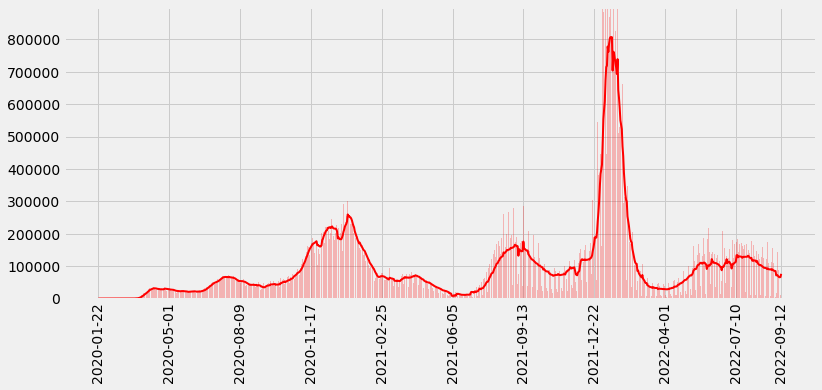

In [6]:
plt.figure(figsize=(12,5))
plt.bar(cvd19.index, cvd19['new cases'], color='red', alpha=.25)
plt.plot(cvd19.index, cvd19['7-day avg'], color='red', linewidth=2)
plt.xlabel('')
_ = plt.xticks(cvd19.index[list(np.arange(0, 1000, 100)) + [len(dates)-1]], rotation=90)
_ = plt.yticks(np.arange(0, 800001, 100000))
_ = plt.ylim(0, 900000)

Compare this to the graph here: [https://github.com/nytimes/covid-19-data](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).


Let's now take the data going back to early April


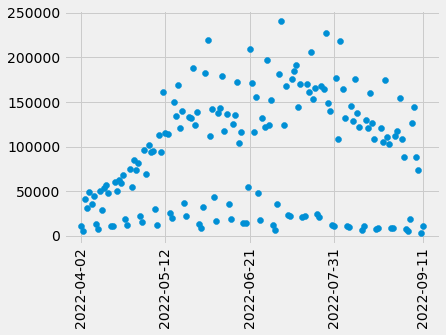

In [7]:
recent = cvd19[(cvd19.index > '2022-04-01') & (cvd19.index < '2022-09-12')]
y = recent['new cases']
dates = recent.index
plt.scatter(dates, y)
_ = plt.xticks(dates[[0, 40, 80, 120, len(dates)-1]], rotation=90)

Now let's remove the data on the weekends

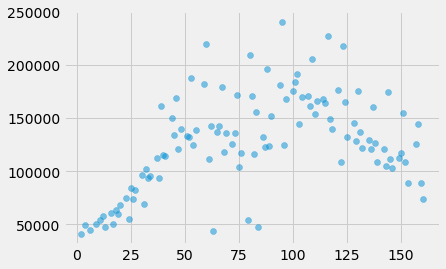

In [8]:
y = np.array(y)
x = np.arange(len(y))
dates = np.array(dates)
is_weekday = (y > 40000)
plt.scatter(x[is_weekday], y[is_weekday], alpha=.5)


Next, fit a linear regression to the data

In [ ]:
import statsmodels.api as sm
x_week = x[is_weekday]
y_week = y[is_weekday]
X = sm.add_constant(x_week)
model = sm.OLS(y_week, X)
result = model.fit()
beta = [result.params[0], result.params[1]]

Finally, plot the results

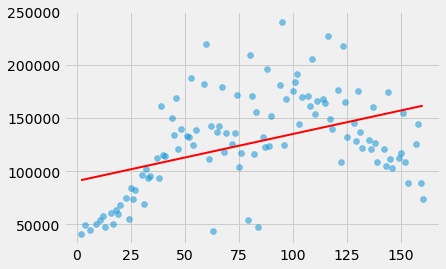

In [10]:
plt.scatter(x_week, y_week, alpha=.5)
_ = plt.plot(x_week, beta[0] + beta[1]*x_week, color='red', linewidth=2)

Let's now fit a quadratic model by just adding a variable $x^2$

In [11]:
X = sm.add_constant(x_week)
model = sm.OLS(y_week, X)
result = model.fit()
beta = [result.params[0], result.params[1]]

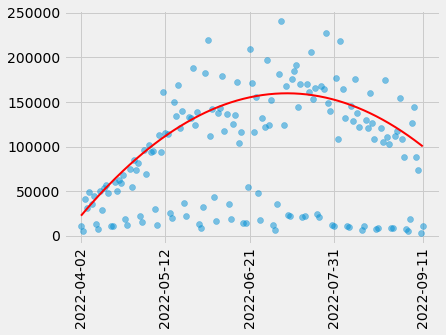

In [12]:
# form an array with 1, x, x^2

x_week = x[is_weekday]
y_week = y[is_weekday]
X = np.array([np.ones(len(x_week)), x_week, x_week**2])
X = X.T

# fit a linear model
model = sm.OLS(y_week, X)
result = model.fit()
beta = [result.params[0], result.params[1], result.params[2]]

# plot the result
plt.scatter(dates, y, alpha=.5)
plt.plot(x, beta[0] + beta[1]*x + beta[2]*x**2, color='red', linewidth=2)
_ = plt.xticks(dates[[0, 40, 80, 120, len(dates)-1]], rotation=90)


A much better fit! The take-away: By removing "outliers" and adding "features" of the original data, we can get more accurate fits to the data.

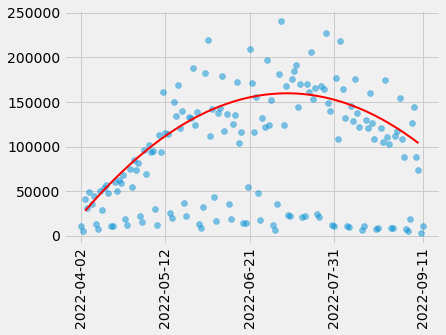

In [13]:
# Here is the same thing but using "matrix/vector thinking" with numpy

beta = np.array([result.params[0], result.params[1], result.params[2]])
yhat = np.dot(X, beta)

# plot the result
plt.scatter(dates, y, alpha=.5)
plt.plot(X[:,1], yhat, color='red', linewidth=2)
_ = plt.xticks(dates[[0, 40, 80, 120, len(dates)-1]], rotation=90)

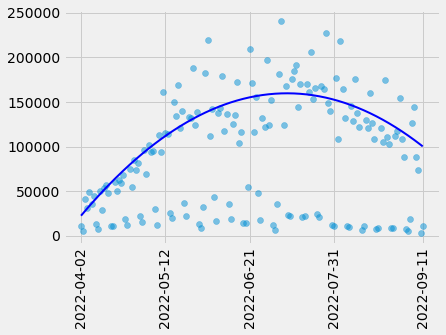

In [14]:
from scipy.optimize import minimize

def covid19_quadratic_rmse(beta):
    x = x_week
    y = y_week
    estimate = beta[0] + beta[1]*x + beta[2]*(x**2)
    return np.sum((y - estimate) ** 2) # ** 0.5

opt = minimize(covid19_quadratic_rmse, x0=10*np.ones(3))
beta_new = opt.x

plt.scatter(dates, y, alpha=.5)
plt.plot(x, beta_new[0] + beta_new[1]*x + beta_new[2]*x**2, color='blue', linewidth=2)
_ = plt.xticks(dates[[0, 40, 80, 120, len(dates)-1]], rotation=90)


The take-away here: We can fit the model by numerically optimizing the least squares fit, with minimal math! This is what many machine learning methods do.